In [7]:
import pandas as pd
import mediapipe as mp
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import io
from IPython.display import display, Image

In [8]:
def get_specific_frames(cap, frame_indices):
    frames = []
    for frame_index in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
        ret, frame = cap.read()
        if ret:
            frames.append(frame)
    return frames


def show_frames_jupyter(frames):
    for frame in frames:
        _, encoded_image = cv2.imencode('.png', frame)
        i = display(Image(data=encoded_image.tobytes()), display_id=True)
        i.update(Image(data=encoded_image.tobytes()))

# Frames sem os keypoints


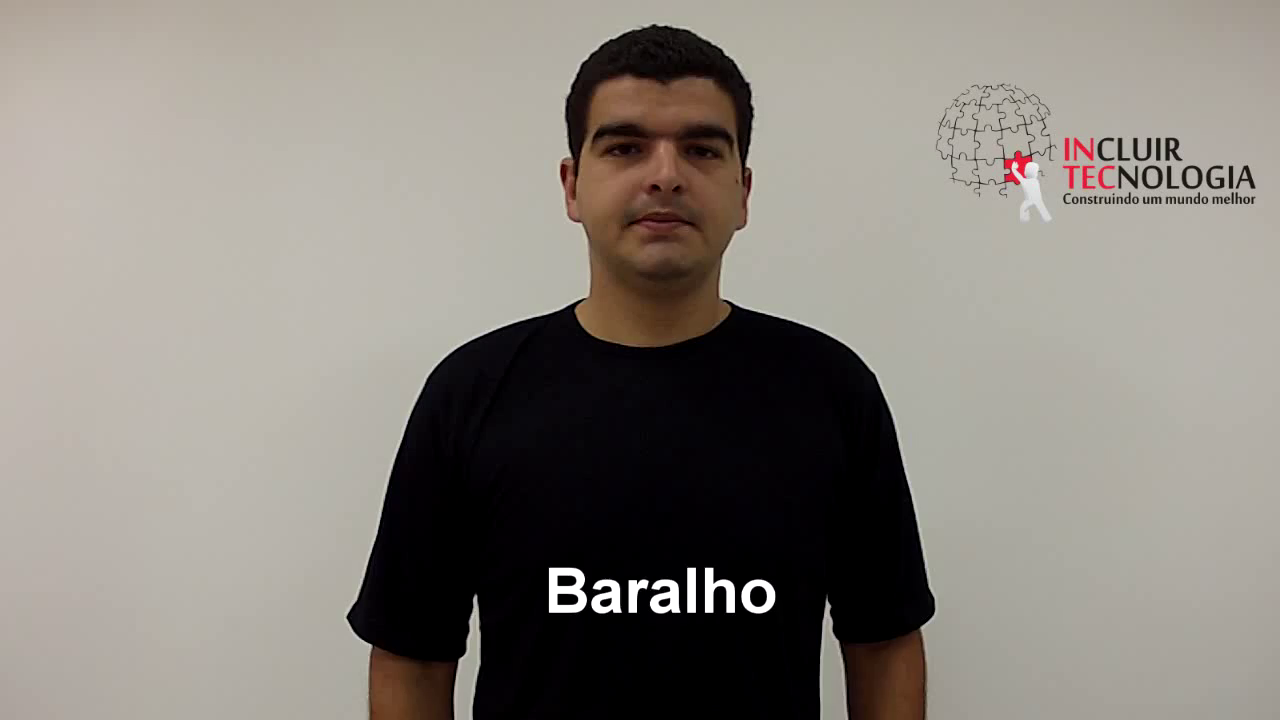

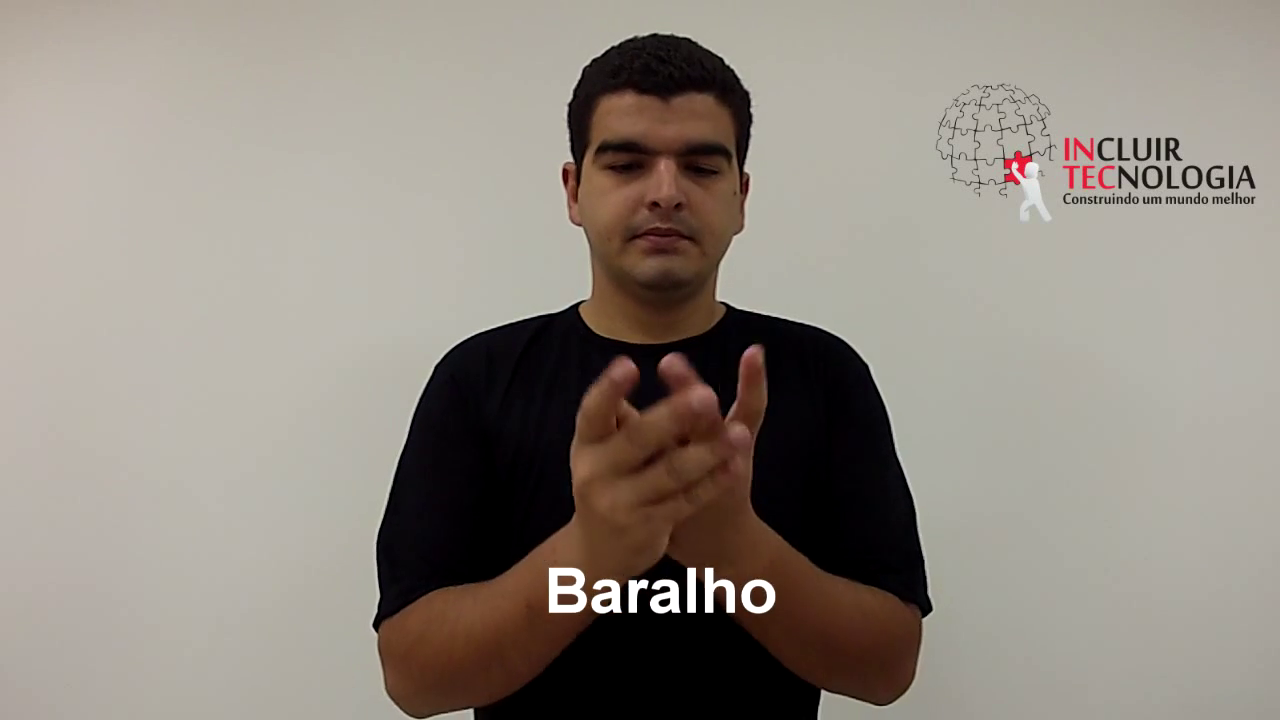

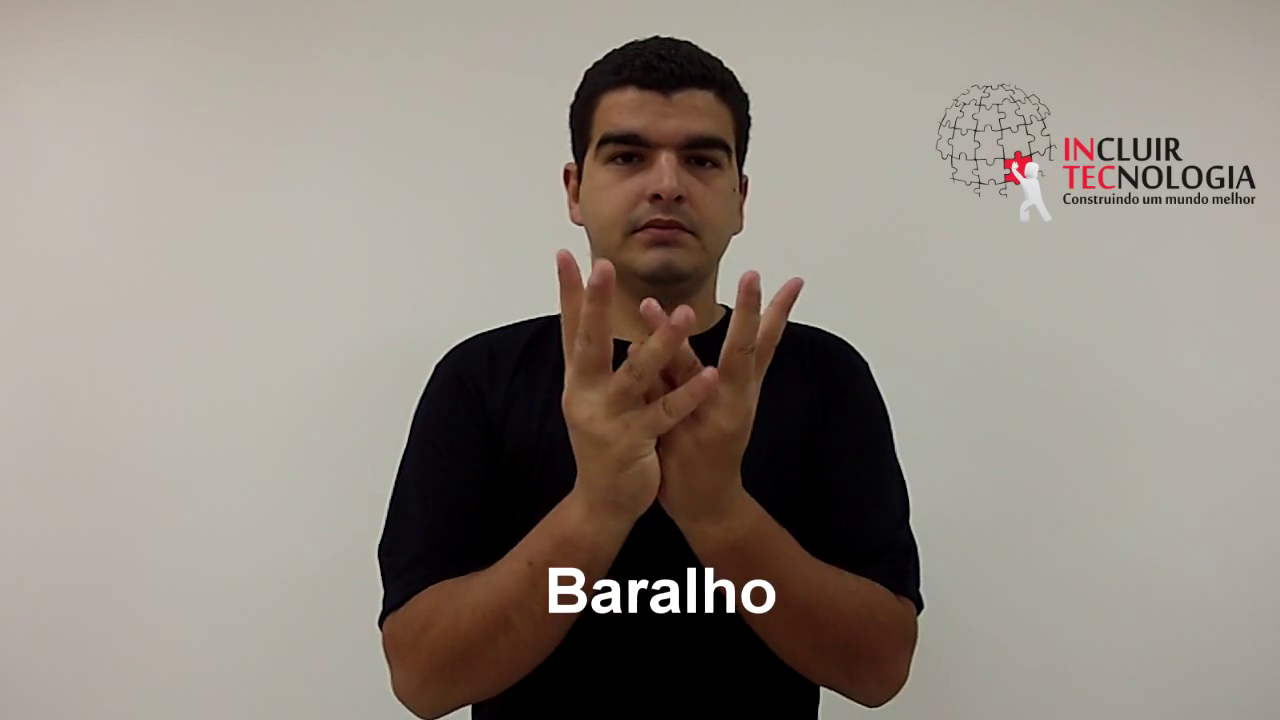

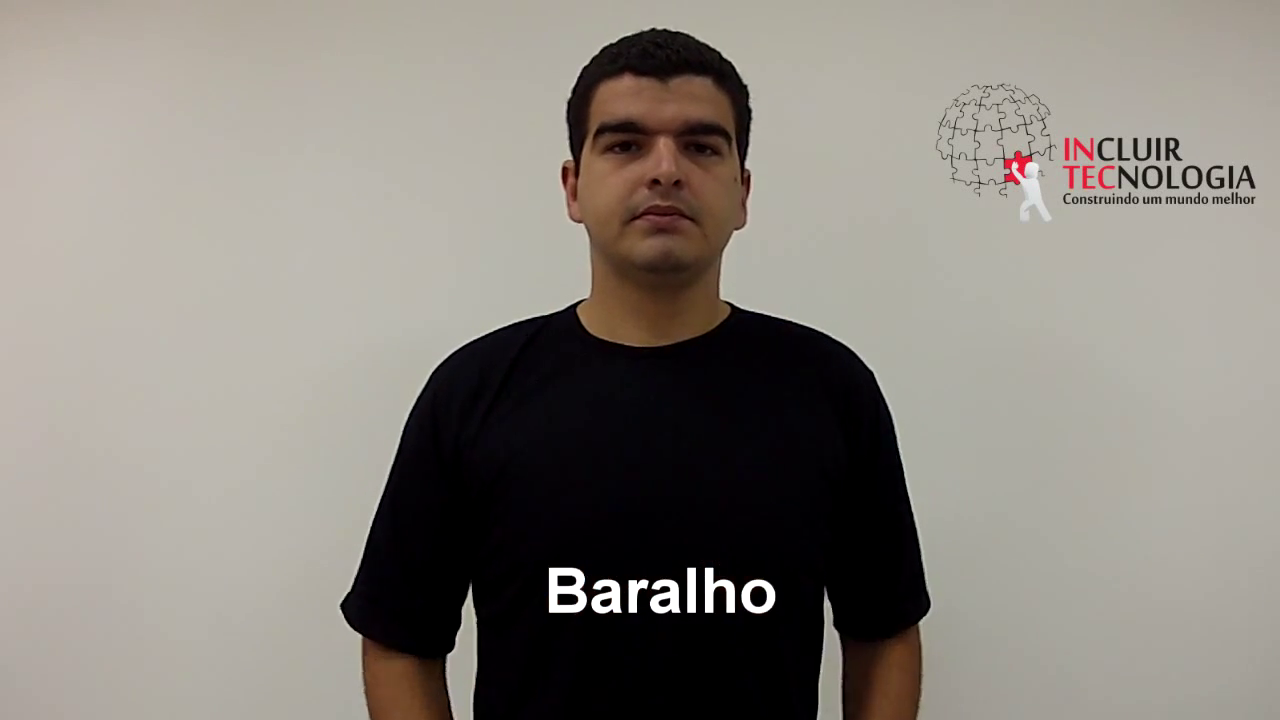

In [12]:
cap = cv2.VideoCapture(
    '/mnt/B-SSD/bernardo/videos_input/Libras - Baralho (720p_30fps_H264-128kbit_AAC).mp4')


total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
start_frame = 0
middle_frame1 = total_frames // 3
middle_frame2 = total_frames // 3 * 2
end_frame = total_frames - 1

frames = get_specific_frames(
    cap, [start_frame, middle_frame1, middle_frame2, end_frame])

show_frames_jupyter(frames)

In [13]:

mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)



mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(
    static_image_mode=False,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)


hand_drawing_spec = mp_drawing.DrawingSpec(
    color=(255, 255, 255), thickness=2, circle_radius=2)  
face_drawing_spec = mp_drawing.DrawingSpec(
    color=(0, 255, 0), thickness=1, circle_radius=1)  
pose_drawing_spec = mp_drawing.DrawingSpec(
    color=(255, 255, 255), thickness=2, circle_radius=4)  


def generate_holistic_keypoints(frames):
    processed_frames = []
    for frame in frames:
        
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        
        results = holistic.process(rgb_frame)

        
        if results.face_landmarks:
            mp_drawing.draw_landmarks(
                image=frame,
                landmark_list=results.face_landmarks,
                connections=mp_holistic.FACEMESH_CONTOURS,
                landmark_drawing_spec=face_drawing_spec,
                connection_drawing_spec=face_drawing_spec)
        
        if results.left_hand_landmarks:
            mp_drawing.draw_landmarks(
                image=frame,
                landmark_list=results.left_hand_landmarks,
                connections=mp_holistic.HAND_CONNECTIONS,
                landmark_drawing_spec=hand_drawing_spec,
                connection_drawing_spec=hand_drawing_spec)

        if results.right_hand_landmarks:
            mp_drawing.draw_landmarks(
                image=frame,
                landmark_list=results.right_hand_landmarks,
                connections=mp_holistic.HAND_CONNECTIONS,
                landmark_drawing_spec=hand_drawing_spec,
                connection_drawing_spec=hand_drawing_spec)

        if results.pose_landmarks:
            mp_drawing.draw_landmarks(
                image=frame,
                landmark_list=results.pose_landmarks,
                connections=mp_holistic.POSE_CONNECTIONS,
                landmark_drawing_spec=pose_drawing_spec,
                connection_drawing_spec=pose_drawing_spec)


        processed_frames.append(frame)

    return processed_frames

I0000 00:00:1706624308.370177 2682270 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1706624308.402267 2690092 gl_context.cc:344] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 525.147.05), renderer: NVIDIA RTX A6000/PCIe/SSE2


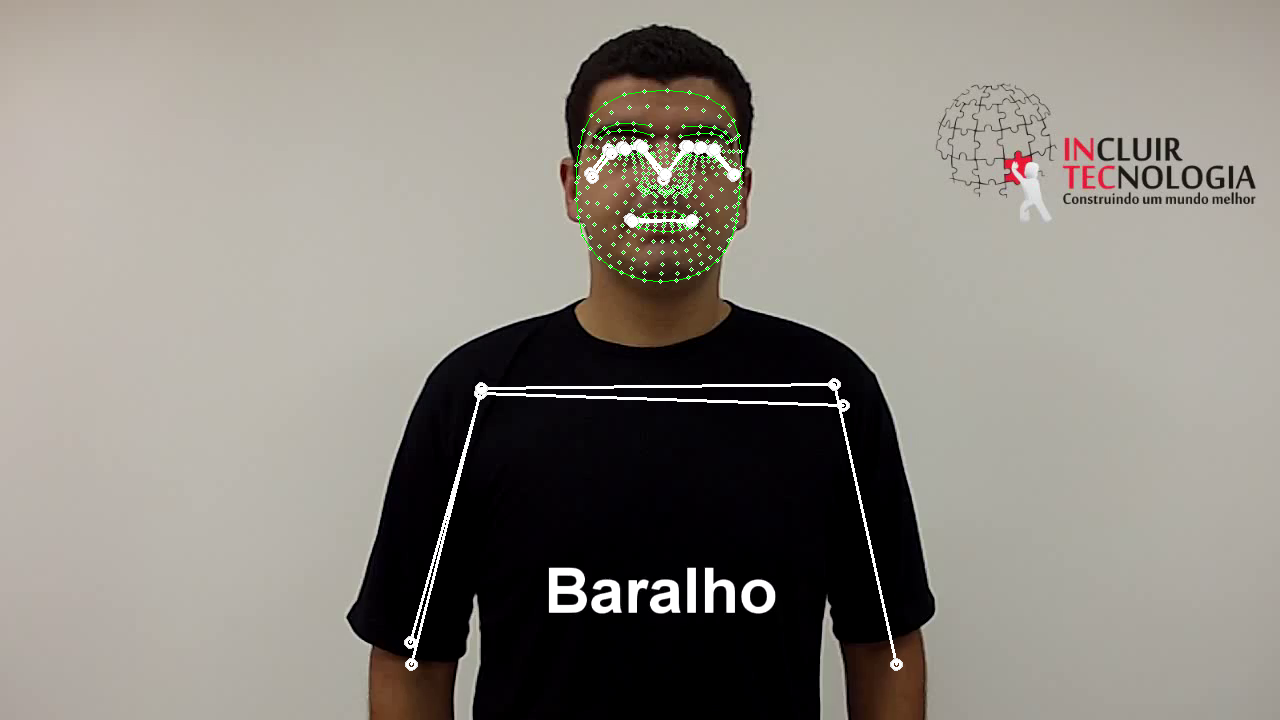

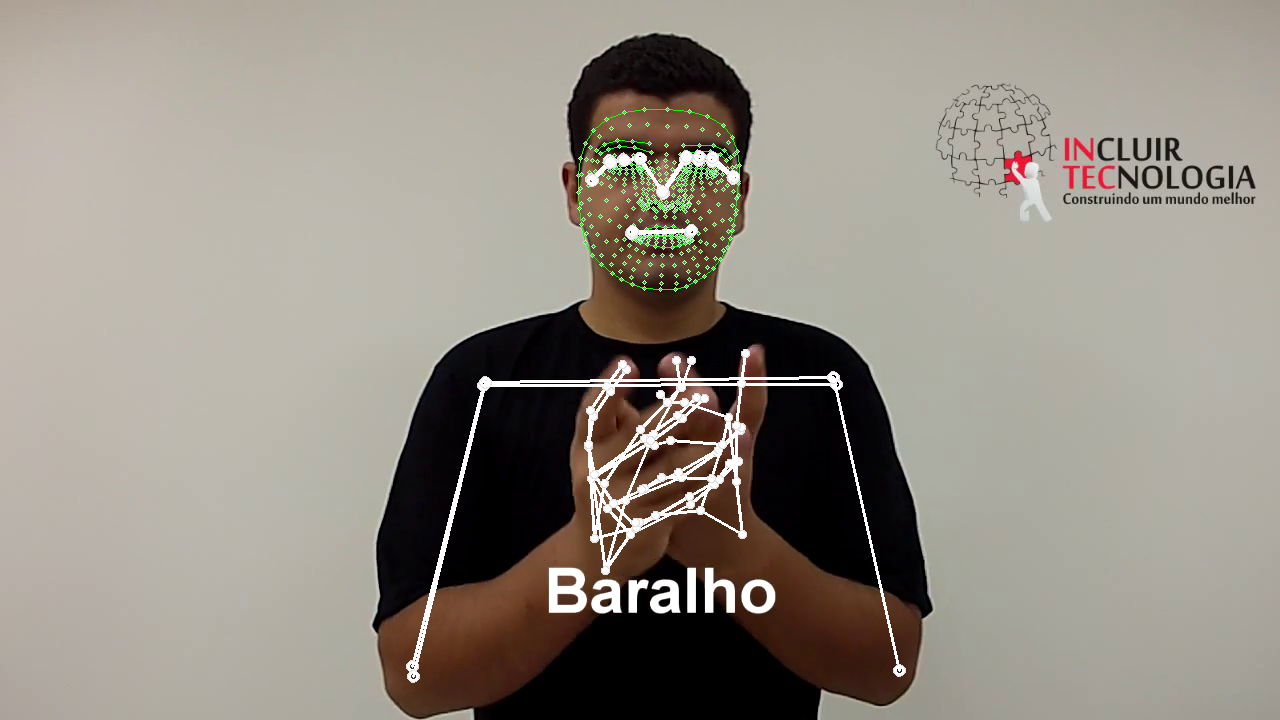

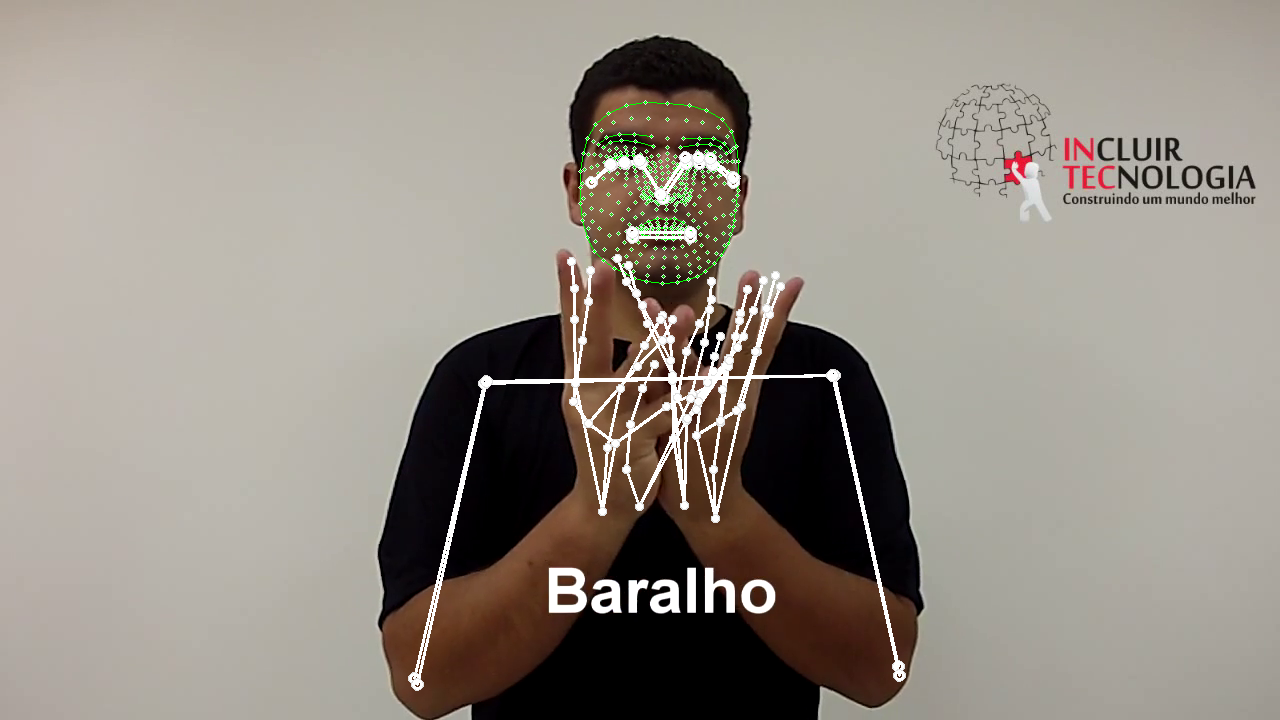

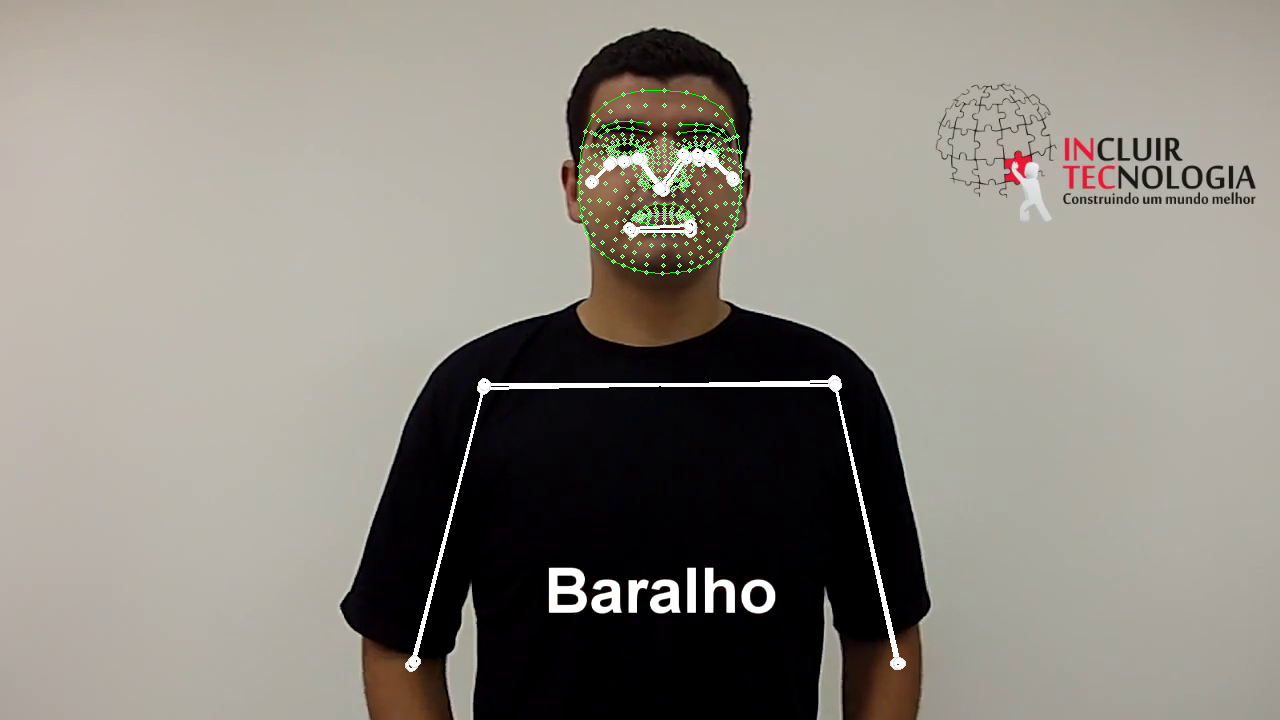

In [15]:
keypointed_frames = generate_holistic_keypoints(frames)
show_frames_jupyter(keypointed_frames)